# <span style="color:red">**Attrition Prediction**</span>

---

### <font color=crimson>Problem Statement:</font>
- <font color=skyblue>  *Build and train a model to predict employee attrition with best accuracy.*</font>

---

> - ##### Neccessary imports

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

%matplotlib inline
plt.style.use('ggplot')

> - ##### Loading the Attrition data and doing some EDA

In [4]:
att = pd.read_csv('data/Attrition.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
att.shape

(1470, 35)

In [5]:
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
att.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [7]:
att.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [9]:
att.Age.values

array([41, 49, 37, ..., 27, 49, 34])

### <font color=crimson> *Compairing how some features are related with one another ...*</font>

In [10]:
df = pd.DataFrame({'Age':att.Age.values, 'Job_Satisfaction': att.JobSatisfaction.values})

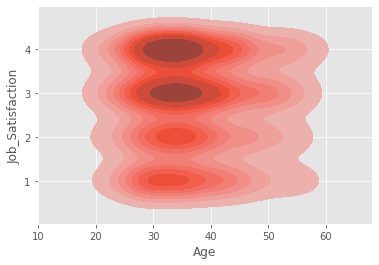

In [11]:
sns.kdeplot(y='Job_Satisfaction', x='Age', data=df, shade=True);

In [12]:
df = pd.DataFrame({'WorkLifeBalance':att.WorkLifeBalance.values, 'JobSatisfaction':att.JobSatisfaction.values})

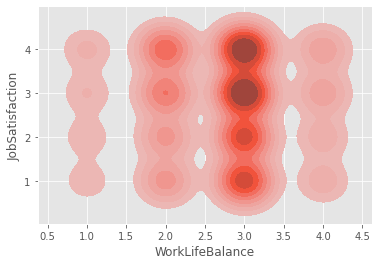

In [13]:
sns.kdeplot(y='JobSatisfaction', x='WorkLifeBalance', data=df, shade=True);

In [14]:
# Dropping column as it does not help in model creation
att.drop(['EmployeeNumber'], axis=1, inplace=True)

### <font color=crimson> *Plotting correlation matrix of features using sns.heatmap...*</font>

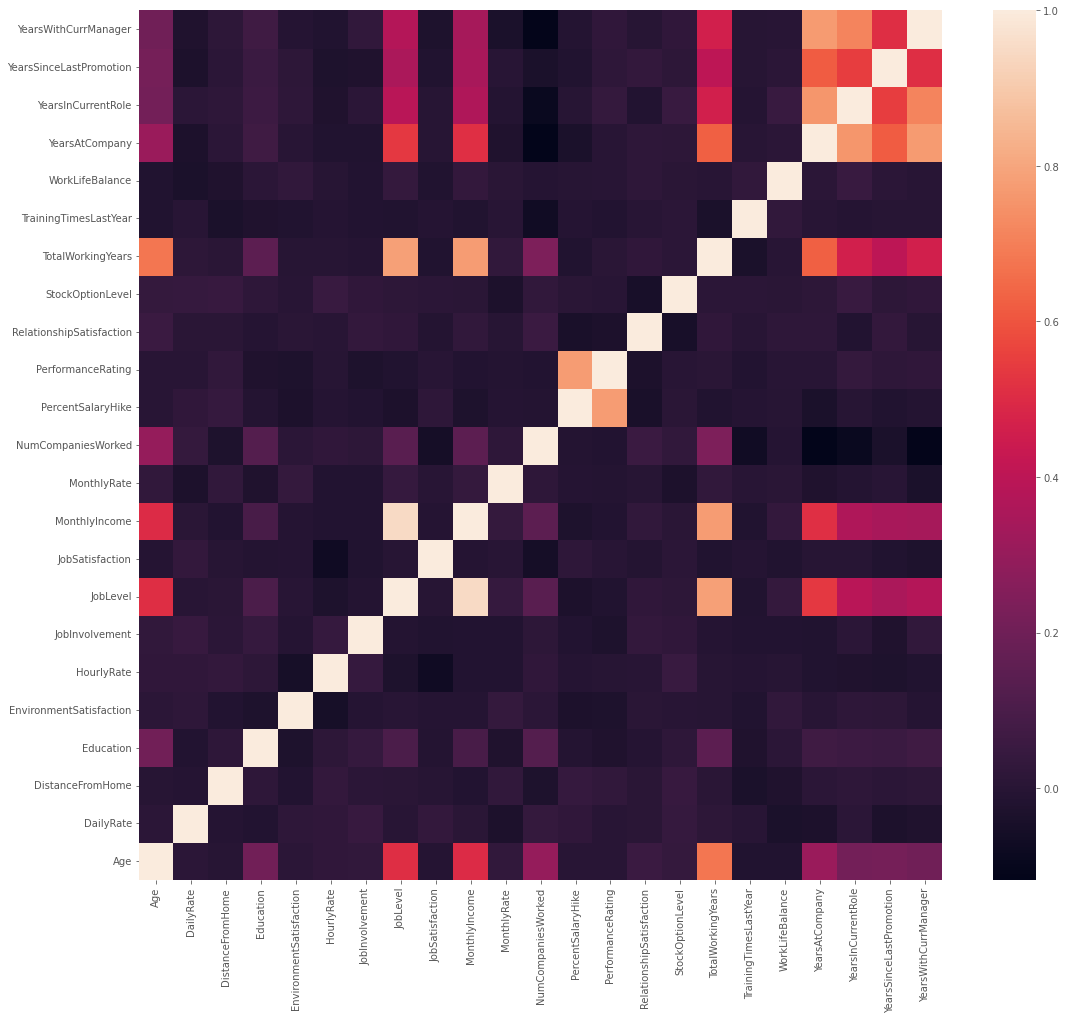

In [15]:
num_cols=['Age', 'DailyRate', 'DistanceFromHome', 
             'Education', 'EnvironmentSatisfaction',
             'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
             'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'TotalWorkingYears',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
             'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
z=att[num_cols].astype(float).corr().values
x=att[num_cols].columns.values
y=att[num_cols].columns.values

plt.figure(figsize=(18,16))
ax = sns.heatmap(z, xticklabels=x, yticklabels=y)
ax.invert_yaxis()

<AxesSubplot:>

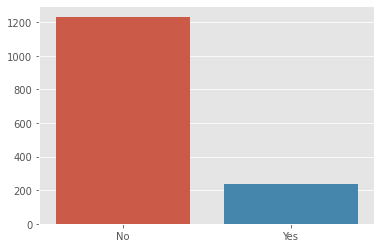

In [16]:
x = att.Attrition.value_counts().index.values
y = att.Attrition.value_counts().values

sns.barplot(x=x, y=y)

In [17]:
# Changing data type of target variable from categorical to numerical

att.Attrition.replace({'Yes':1, 'No':0}, inplace=True)
att.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [18]:
att.dtypes.where(att.dtypes=='object').dropna() #Checking what are the object coumns in data

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [19]:
att.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

### <font color=crimson> *Meticulously replacing all categorical values to numerical and dropping one unnecessary column 'Over18'.*</font>

In [20]:
att.BusinessTravel.replace({"Non-Travel":0, "Travel_Rarely":1, "Travel_Frequently":2}, inplace=True)
att.Department.replace({"Sales":0, "Research & Development":1, "Human Resources": 2}, inplace=True)
att.EducationField.replace({"Human Resources":5, "Technical Degree":4, "Marketing":3, "Medical":2,
                            "Life Sciences": 1,
                            "Other": 0  }, inplace=True)
att.Gender.replace({"Male": 0, "Female": 1 }, inplace=True)
att.JobRole.replace({"Manager":8, "Human Resources": 7,"Research Director": 6, "Manufacturing Director": 5,
                     "Research Scientist": 4, "Sales Executive": 3, "Healthcare Representative": 2,
                     "Sales Representative": 1, "Laboratory Technician": 0  }, inplace=True)
att.MaritalStatus.replace({"Single":0, "Married":1, "Divorced":2}, inplace=True)
att.OverTime.replace({"Yes":1, "No":0}, inplace=True)
att.drop(['Over18'], axis=1, inplace=True)
att.dtypes.where(att.dtypes=='object').dropna()

Series([], dtype: object)

In [21]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EmployeeCount               1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1

### <font color=crimson> *Creating corresponding x and y values for training and model building purposes.* </font>

In [22]:
att_x = att.drop(['Attrition'], axis=1)
att_x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,0,1,2,1,1,2,1,94,3,2,3,4,0,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,2,279,1,8,1,1,1,3,0,61,2,2,4,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,0,1,4,0,92,2,1,0,3,0,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,1,3,4,1,1,4,1,56,3,1,4,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,1,591,1,2,1,2,1,1,0,40,3,1,0,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


In [23]:
att_y = att.iloc[:, 1]
att_y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### Splitting data into train & test

In [24]:
from sklearn.model_selection import train_test_split

att_x_train, att_x_test, att_y_train, att_y_test = train_test_split(att_x, att_y, test_size=.2, random_state = 412)

---
#  <font color=crimson> Model Building</font>
---

> #### <font color=#ff6b6b> 1. Logistic Regression</font>
<br/>

In [25]:
from sklearn.linear_model import LogisticRegression

log =LogisticRegression(n_jobs=-1)

In [26]:
log.fit(att_x_train, att_y_train)

pred = log.predict(att_x_test)

In [27]:
from sklearn.metrics import confusion_matrix

tab = confusion_matrix(pred, att_y_test)
tab

array([[248,  42],
       [  1,   3]])

In [28]:
# Printing accuracy
tab.diagonal().sum() / tab.sum() *100

85.37414965986395

In [207]:
# Plotting AUROC 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [208]:
log_auroc = roc_auc_score(pred, att_y_test)
log_auroc

0.8025862068965517

In [209]:
#Plotting

pred_proba = pd.DataFrame(log.predict_proba(att_x_test))
fpr, tpr, thres = roc_curve(att_y_test, pred_proba.iloc[:, 1]) # Selecting probabilities of 'Yes' in Attrition

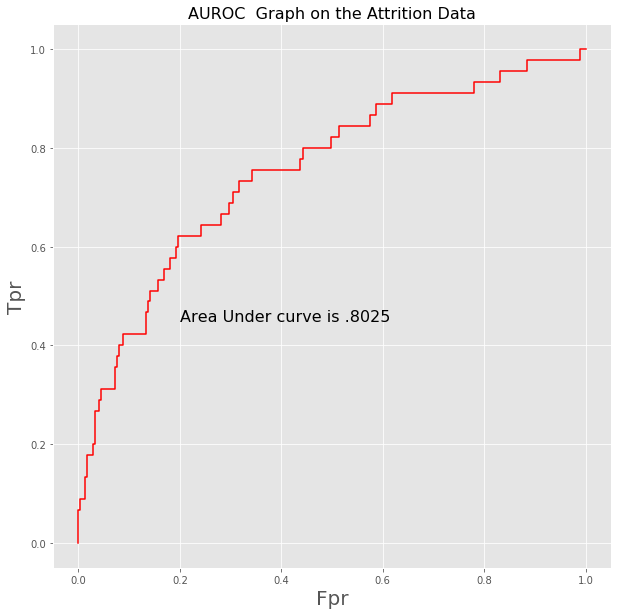

In [210]:
plt.figure(figsize=(10, 10))
plt.plot(fpr , tpr ,color  = "r")
plt.xlabel("Fpr"  , size = 20)
plt.ylabel("Tpr"  , size = 20)
plt.title("AUROC  Graph on the Attrition Data"  , size = 16)
plt.text(x = .2 , y = .45  , s = "Area Under curve is .8025" , size = 16)
plt.grid(b=True)
plt.show() 

---
---

> #### <font color=#ff6b6b> 2. Decision Tree</font>
<br/>

In [211]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', class_weight = "balanced", max_depth=4 )

In [212]:
dt.fit(att_x_train, att_y_train)
pred_dt = dt.predict(att_x_test)

In [213]:
tab_dt = confusion_matrix(pred_dt, att_y_test)
tab_dt

array([[211,  21],
       [ 38,  24]])

In [214]:
# Printing accuracy
tab_dt.diagonal().sum() / tab_dt.sum() *100

79.93197278911565

In [215]:
#AUROC

dt_auroc = roc_auc_score(pred_dt, att_y_test)
dt_auroc

0.6482897664071191

In [216]:
pred_dt_proba = pd.DataFrame(dt.predict_proba(att_x_test))
fpr, tpr, thres = roc_curve( att_y_test, pred_dt_proba.iloc[:,1])

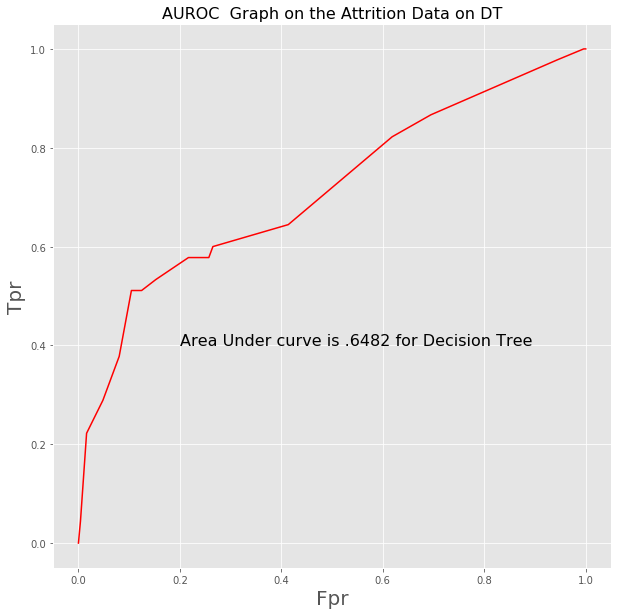

In [217]:
#Plotting

plt.figure(figsize=(10, 10))
plt.plot(fpr , tpr ,color  = "r")
plt.xlabel("Fpr"  , size = 20)
plt.ylabel("Tpr"  , size = 20)
plt.title("AUROC  Graph on the Attrition Data on DT"  , size = 16)
plt.text(x = .2 , y = .4  , s = "Area Under curve is .6482 for Decision Tree" , size = 16)
plt.grid(b=True)
plt.show() 

In [218]:
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
import pydot

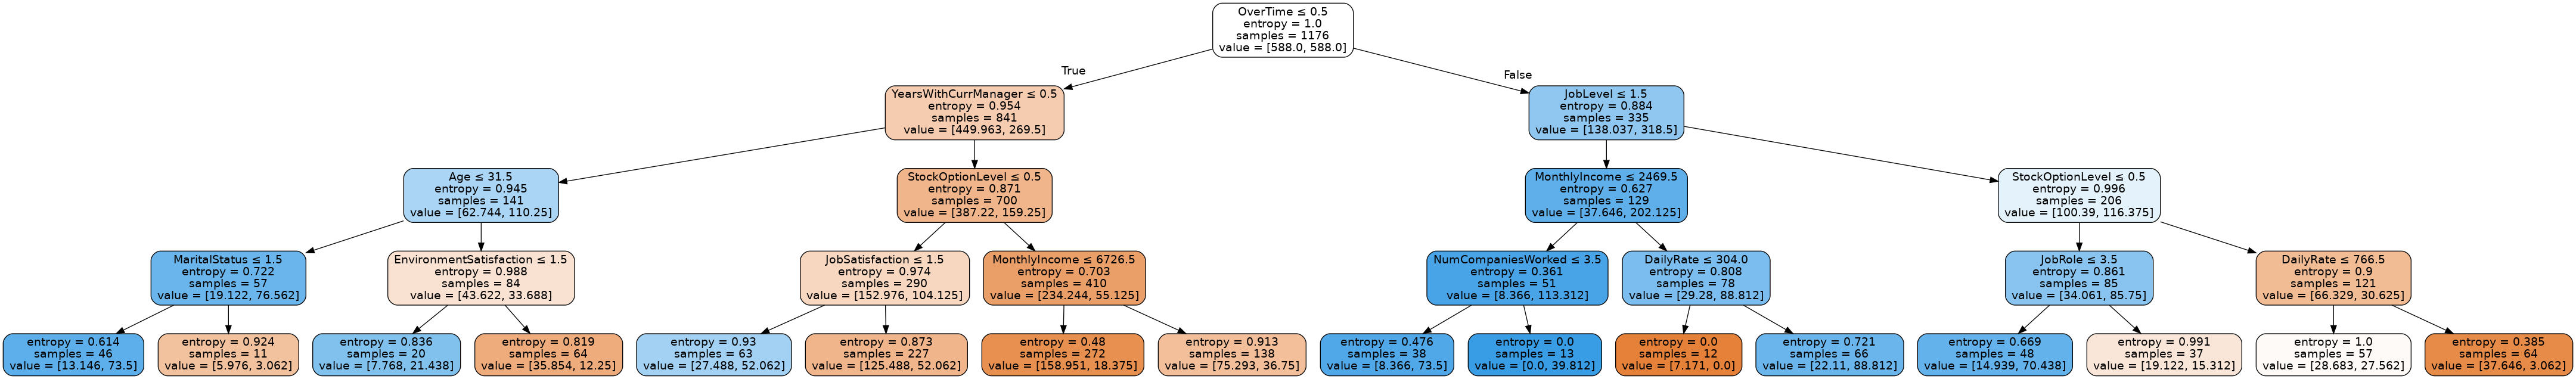

<Figure size 1008x1008 with 0 Axes>

In [219]:
dot_data = StringIO()

x_colnames = att_x_train.columns

fig = plt.figure(figsize=(14,14))

export_graphviz(dt, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names=x_colnames)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

graph.write_png('DT_pic.png')
Image(graph.create_png())

---
---

> #### <font color=#ff6b6b> 3. Random Forest</font>
<br/>

In [220]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators  = 250 ,  class_weight = "balanced")

rf.fit(att_x_train, att_y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=250)

In [221]:
pred_rf = rf.predict(att_x_test)

tab_rf = confusion_matrix(pred_rf, att_y_test)
tab_rf

array([[249,  38],
       [  0,   7]])

In [222]:
# Printing accuracy
tab_rf.diagonal().sum() / tab_rf.sum() *100

87.07482993197279

In [223]:
#AUROC

rf_auroc = roc_auc_score(pred_rf, att_y_test)
rf_auroc

0.9337979094076655

In [224]:
pred_rf_proba = pd.DataFrame(rf.predict_proba(att_x_test))
fpr, tpr, thres = roc_curve( att_y_test, pred_rf_proba.iloc[:,1])

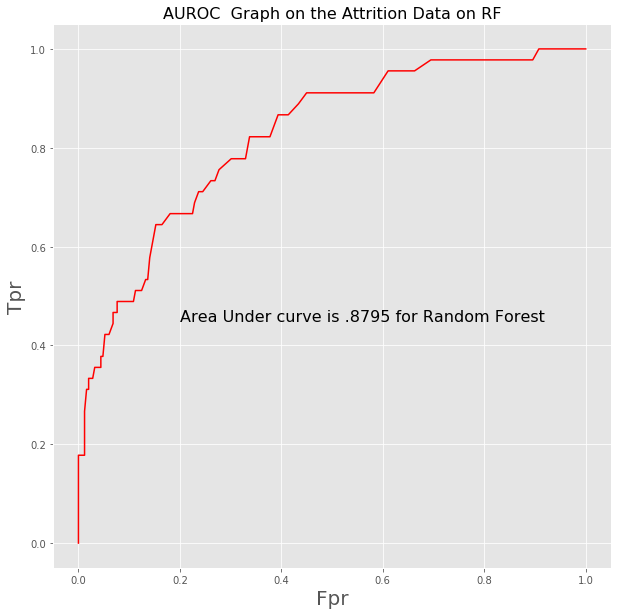

In [225]:
plt.figure(figsize=(10, 10))
plt.plot(fpr , tpr ,color  = "r")
plt.xlabel("Fpr"  , size = 20)
plt.ylabel("Tpr"  , size = 20)
plt.title("AUROC  Graph on the Attrition Data on RF"  , size = 16)
plt.text(x = .2 , y = .45  , s = "Area Under curve is .8795 for Random Forest" , size = 16)
plt.grid(b=True)
plt.show()


### <font color=crimson> *Plotting Feature Importance...*</font>


In [226]:
y = rf.feature_importances_
x = att_x.columns.values

In [227]:
data = pd.DataFrame({'Features': x, 'Importance': y})
data.sort_values(by=['Importance'],ascending=False,inplace=True )
data.head()

,Features,Importance
16,MonthlyIncome,0.066701
19,OverTime,0.066302
0,Age,0.059435
2,DailyRate,0.051287
17,MonthlyRate,0.050244


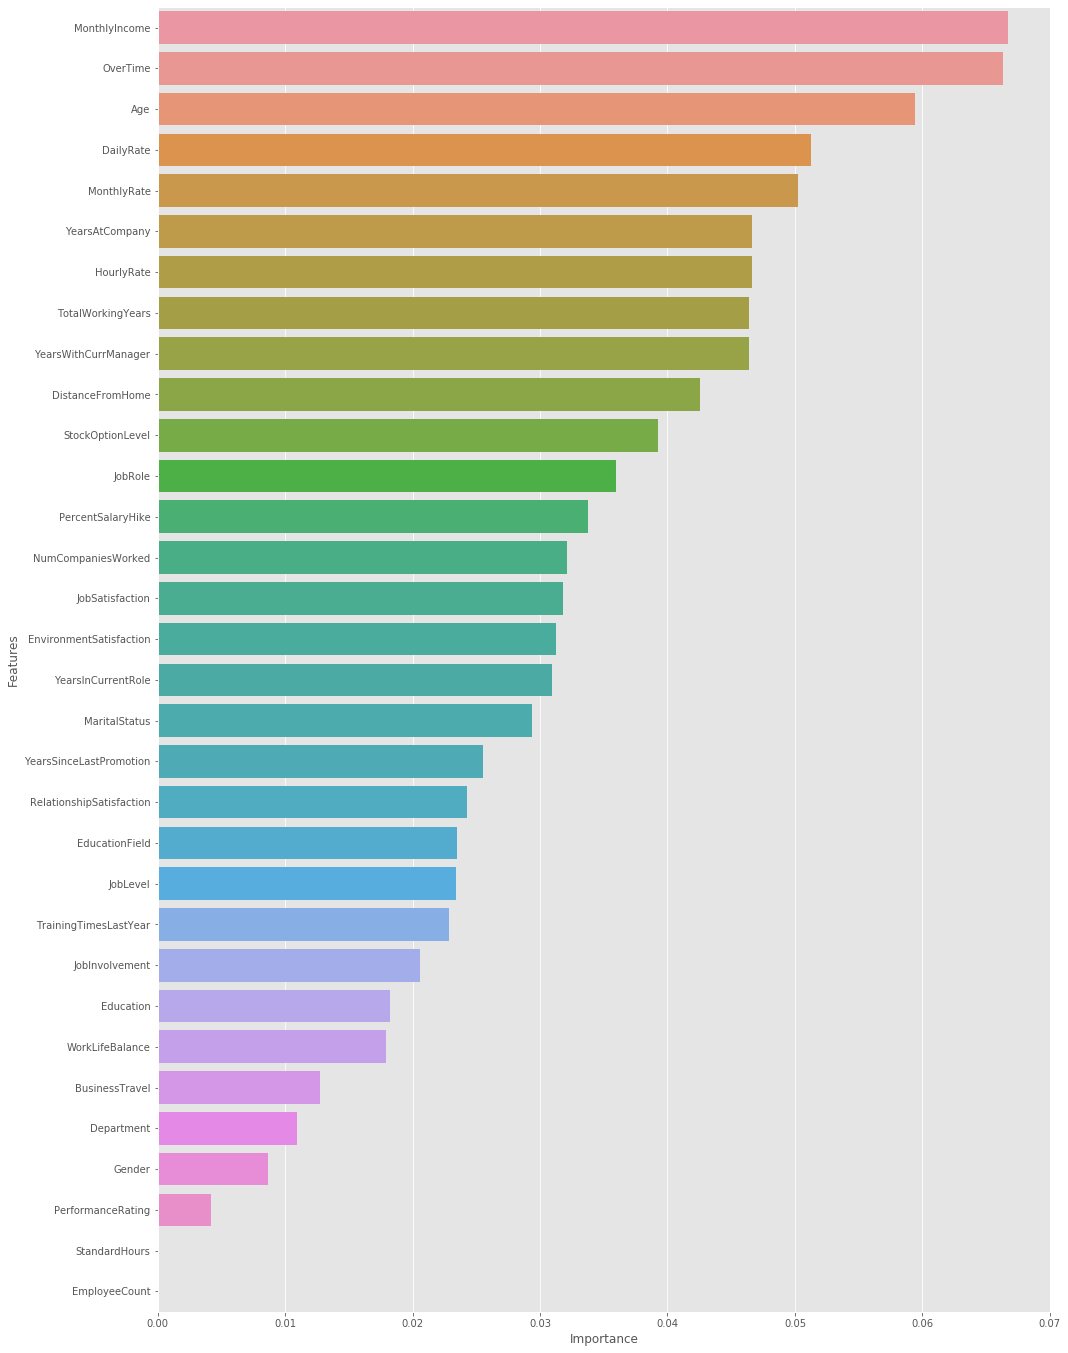

In [228]:
plt.figure(figsize=(16,24))
sns.barplot(x='Importance', y='Features', data=data, orient='h')

---
---

> #### <font color=#ff6b6b> 4. Naive Bayes</font>
<br/>

In [229]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [230]:
nb.fit(att_x_train, att_y_train)

pred_nb = nb.predict(att_x_test)

tab_nb = confusion_matrix(pred_nb, att_y_test)
tab_nb

array([[149,  19],
       [100,  26]])

In [231]:
# Printing accuracy

tab_nb.diagonal().sum() / tab_nb.sum() *100

59.523809523809526


---
## <font color=brown> **CONCLUSION:** </font>

> ### <font color=#f7a16f> *The prediction of employee attrition is conducted with models based on different algorithms. It can be seen above that only the model created with Random Forest returns an accuracy of 88% (approx.). Some Feature Engineering and EDA have also been performed on the data prior to model building.* </font>
---